# ***Installing Libraries***

In [ ]:
!pip install featuretools 
!pip install autoviml --upgrade --ignore-installed
!pip install featurewiz

     |████████████████████████████████| 327 kB 4.1 MB/s 
     |████████████████████████████████| 11.3 MB 42.4 MB/s 
     |████████████████████████████████| 636 kB 42.0 MB/s 
     |████████████████████████████████| 786 kB 44.8 MB/s 
     |████████████████████████████████| 296 kB 42.4 MB/s 
     |████████████████████████████████| 125 kB 47.5 MB/s 
     |████████████████████████████████| 779 kB 38.2 MB/s 
     |████████████████████████████████| 778 kB 24.8 MB/s 
     |████████████████████████████████| 776 kB 24.8 MB/s 
     |████████████████████████████████| 769 kB 45.1 MB/s 
     |████████████████████████████████| 766 kB 38.6 MB/s 
     |████████████████████████████████| 1.0 MB 36.8 MB/s 
     |████████████████████████████████| 722 kB 42.0 MB/s 
     |████████████████████████████████| 722 kB 40.9 MB/s 
     |████████████████████████████████| 715 kB 37.9 MB/s 
     |████████████████████████████████| 705 kB 41.6 MB/s 
     |████████████████████████████████| 699 kB 37.3 MB/s 
     |████████

     |████████████████████████████████| 125 kB 4.2 MB/s 
  Using cached pandas-1.3.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
     |████████████████████████████████| 788 kB 22.0 MB/s 
     |████████████████████████████████| 189 kB 48.2 MB/s 
     |████████████████████████████████| 356 kB 40.1 MB/s 
     |████████████████████████████████| 292 kB 41.7 MB/s 
     |████████████████████████████████| 1.5 MB 34.3 MB/s 
     |████████████████████████████████| 125 kB 50.5 MB/s 
     |████████████████████████████████| 636 kB 36.1 MB/s 
     |████████████████████████████████| 747 kB 36.8 MB/s 
     |████████████████████████████████| 76.4 MB 62 kB/s 
     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 23.1 MB 1.7 MB/s 
     |████████████████████████████████| 185 kB 43.4 MB/s 
     |████████████████████████████████| 10.3 MB 46.3 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████|

     |████████████████████████████████| 69 kB 2.9 MB/s 
     |████████████████████████████████| 1.0 MB 8.9 MB/s 
     |████████████████████████████████| 80 kB 8.7 MB/s 
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


# ***Importing libraries***

In [1]:
import pandas as pd
import seaborn as sns

# ***Loading Dataset***

In [2]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# **Preparing Train and Target**

In [3]:
df.dropna(inplace = True)
df.reset_index(drop = True,inplace = True)

In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [5]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name']].copy()
y = df['mpg'].copy()

# ***Feature Engineering using Feature Tools***

In [6]:
import featuretools as ft
#Setting the entity base
es = ft.EntitySet(id = 'model_iris')
es.entity_from_dataframe(entity_id = 'training', dataframe = X, make_index = True, index = 'index')
#Setting the ID based for feature engineering
es.normalize_entity(base_entity_id= 'training', new_entity_id= 'cylindersh', index= 'cylinders')
es.normalize_entity(base_entity_id= 'training', new_entity_id= 'displacement', index= 'displacement')
es.normalize_entity(base_entity_id= 'training', new_entity_id= 'origin', index= 'origin')
#Deep Feature Synthetic
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity= 'training'
,agg_primitives= ['skew', 'count', 'std', 'mean', 'median', 'mode', 'max', 'min'],
trans_primitives = ['add_numeric', 'multiply_numeric'])
feature_matrix.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Columns: 104 entries, cylinders to origin.STD(training.weight)
dtypes: float64(75), int64(22), object(7)
memory usage: 321.6+ KB


In [7]:
feature_matrix['mpg'] = y

# ***Auto-ViML***

Imported Auto_ViML version: 0.1.683. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (392, 105)
    Training Set Memory Usage = 0.32 MB
Single_Label Target: ['mpg']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 392 rows, 104 cols
Too many columns to print
    Numeric Columns: ['displacement', 'horsepower', 'acceleration', 'acceleration + horsepower', 'acceleration + model_year', 'acceleration + weight', 'horsepower + model_year', 'horsepower + weight', 'acceleration * horsepower', 'acceleration * model_year', 'acceleration * weight', 'horsepower * model_year', 'horsepower * weight', 'displacement.MAX(training.acceleration)', 'displacement.MAX(training.horsepower)', 'displacement.MEAN(training.acceleration)', 'displacement.MEAN(training.horsepower)', 'disp

2021-10-03 11:22:42.317436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 11:22:42.318609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 11:22:42.319376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 11:23:47.870105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-03 11:23:47.870949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

        using 10 variables...
        using 7 variables...
        using 4 variables...
        using 1 variables...
Found 13 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  352 , CV rows =  40
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
############### XGBoost M O D E L   B U I L D I N G  B E G I N S  ####################
Rows in Train data set = 352
  Features in Train data set = 12
    Rows in held-out data set = 40
Finding Best Model and Hyper Parameters for XGBoost model...
    CPU Count = 2 in this device
Using XGBoost Model, Estimated Training time = 0.042 mins
    Actual training time (in seconds): 28
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation rms

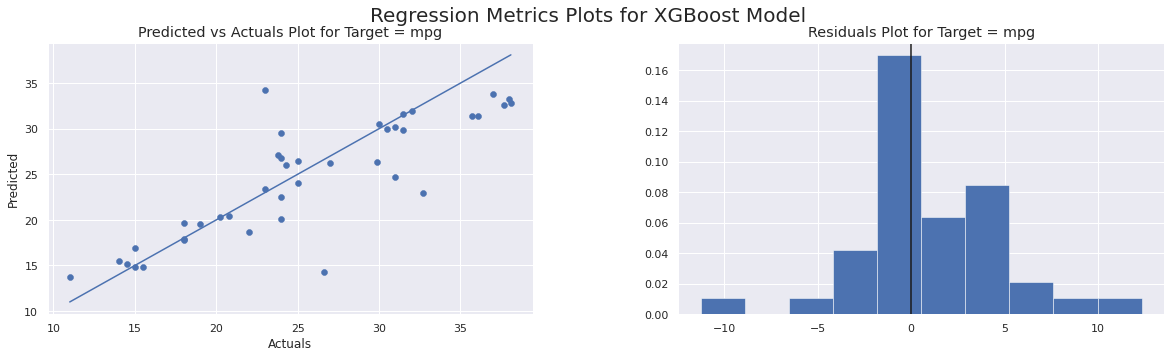

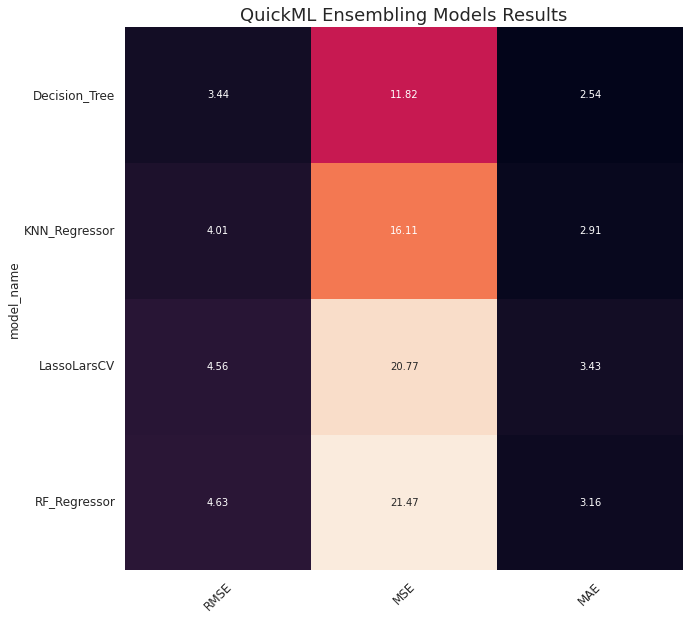

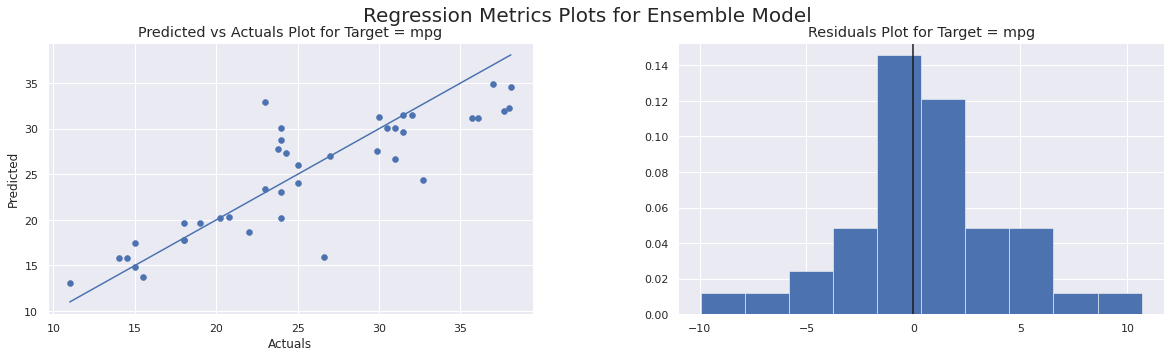

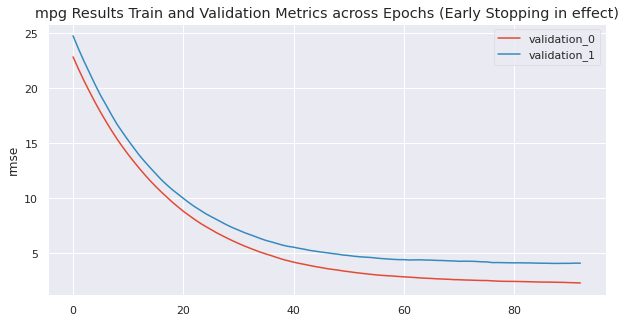

    Time taken for this Target (in seconds) = 98
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
Since there is no Test file, we will do a final prediction on Train itself as return it as testm dataframe
    Calculating weighted average ensemble of 5 regressors
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


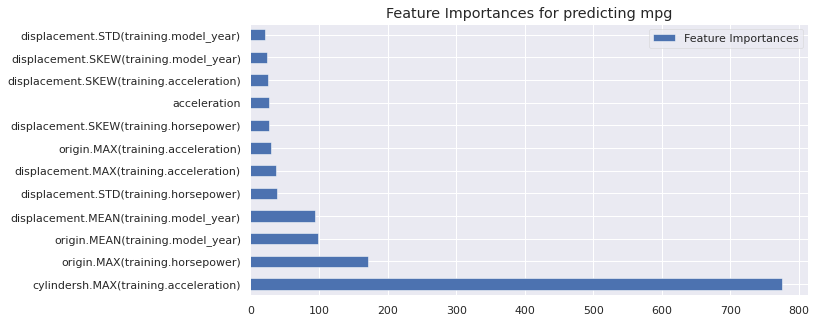

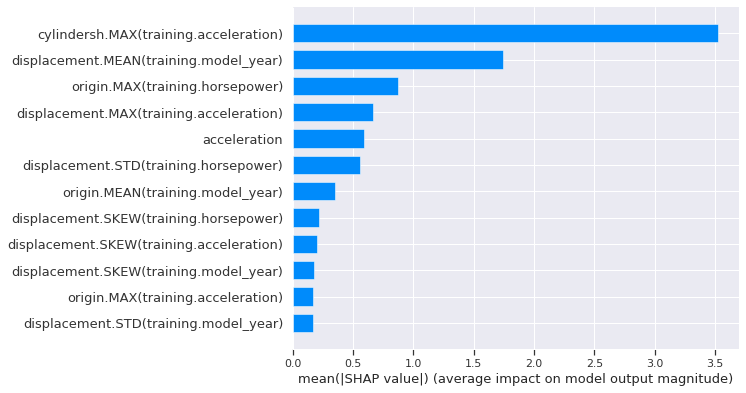

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 105
Writing Output files to disk...
    Saving predictions to ./mpg/mpg_Regression_test_modified.csv
    Saving predictions to ./mpg/mpg_Regression_submission.csv
    Saving predictions to ./mpg/mpg_Regression_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.7 for the Entire Process


In [8]:
from autoviml.Auto_ViML import Auto_ViML
#Auto_ViML have 4 output (The best model, important feature, modified train data, modified test data
model, features, trainm, testm = Auto_ViML(
#We put our train data in the train and specify the target in the target parameter. As we do not have external test data and sample submission, we could leave it blank
train = feature_matrix,
target = "mpg",
test = "",
sample_submission = "",
#We set the hyperparameter search to RS (Randomized Search) for faster model creation. We set the scoring foxus to RMSE as this is regression case and boosting flag as False to using the Random Forest or True to use XGBoost Tree. We also use the feature reduction as True. 
hyper_param="RS",
feature_reduction=True,
scoring_parameter="RMSE",
Boosting_Flag=True,
verbose = 2)

In [9]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=8, gpu_id=0,
             grow_policy='depthwise', importance_type='gain',
             interaction_constraints='', learning_rate=0.05150789303581249,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=209,
             n_jobs=-1, nthread=-1, num_parallel_tree=1,
             predictor='gpu_predictor', random_state=1, reg_alpha=0.5,
             reg_lambda=0.5, scale_pos_weight=1, seed=1, subsample=0.7,
             tree_method='gpu_hist', updater='grow_gpu_hist', ...)

In [10]:
features

['cylindersh.MAX(training.acceleration)',
 'origin.MAX(training.horsepower)',
 'displacement.MEAN(training.model_year)',
 'displacement.MAX(training.acceleration)',
 'origin.MAX(training.acceleration)',
 'displacement.SKEW(training.horsepower)',
 'displacement.STD(training.model_year)',
 'displacement.SKEW(training.model_year)',
 'acceleration',
 'displacement.STD(training.horsepower)',
 'displacement.SKEW(training.acceleration)',
 'origin.MEAN(training.model_year)']

If we only need the Feature Selection capability of Auto-ViML without any modeling process, we could use another package developed by the Auto-ViML team called Featurewiz.


Featurewiz use two back-to-back methods to remove any unnecessary features. They are SULOV (Searching for Uncorrelated List of Variables) followed by the Recursive XGBoost method.

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (392, 105)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    104 Predictors classified...
        4 variable(s) will be ignored since they are ID or low-information variables
GPU active on this device
    Running XGBoost using GPU parameters
Removing 4 columns from further processing since ID or low information variables
    columns removed: ['origin.MAX(training.model_year)', 'origin.MIN(training.model_year)', 'name', 'displacement.MODE(training.name)']
    After removing redundant variables from further processing, features left = 100
#### Single_Label Regression Feature Selection Started ####
Searching for highly correlated variables from 95 variab

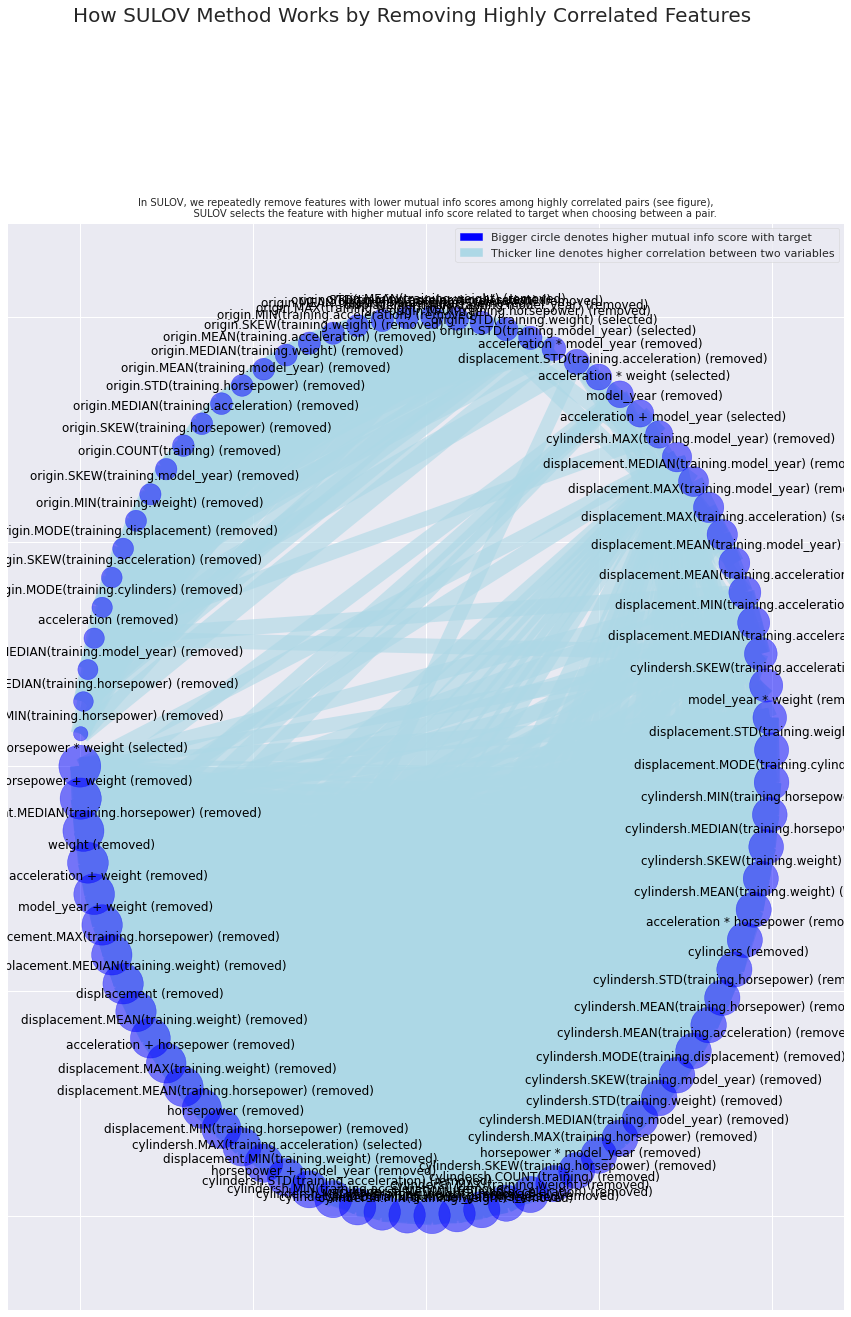

    Adding 5 categorical variables to reduced numeric variables  of 20
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 25 
    Finding Important Features using Boosted Trees algorithm...
        using 25 variables...
        using 20 variables...
        using 15 variables...
        using 10 variables...
        using 5 variables...
Selected 18 important features from your dataset
    Time taken (in seconds) = 4
Returning list of 18 important features and dataframe.


In [12]:
#import the function
from featurewiz import featurewiz
features = featurewiz(
    #Set the dataset you want to do the feature selection
    dataname= feature_matrix,
    #Set the target column
    target = 'mpg',
    #Set threshold for removing variables, the threshold is based on   Pearson correlation
    corr_limit=0.7,
    verbose=2)